In [58]:
%run func_def.ipynb

### <span style='color:green'> **[done]** </span>Loading Features data

In [21]:
loc = '../data/'
file = 'ufc_data_features.csv'
df = pd.read_csv(loc+file)
df = df[df.columns[1:]]
df.tail(3)

,result,fighter,opponent,date,weight class,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
6728,win,Aleksandra Albu,Kailin Curran,2017-07-29,Women's Strawweight,U-DEC:,-0.006641,-0.188401,1.561597,-0.007176,0.153807,-0.248614,0.524829,-0.187746,0.590266,0.306904,0.520523,-1.257415,0.016113,2.032286,0.573098,-2.154226
6729,win,Jarred Brooks,Eric Shelton,2017-07-29,Flyweight,S-DEC:,-0.006641,-0.188401,1.561597,-0.007176,0.956603,0.205996,0.759383,0.384288,-0.289007,0.306904,-0.108500,-0.079956,-0.304653,-0.011958,0.001105,-1.076953
6730,win,Drew Dober,Joshua Burkman,2017-07-29,Lightweight,KO/TKO:Punch,1.347848,0.112924,-0.017596,-0.007176,-0.989064,-0.668254,-0.614435,-0.187746,1.121624,-0.260727,0.654877,0.004148,1.344545,0.115807,0.001105,-2.154226


### <span style='color:green'> **[done]** </span> X = Feature definition:

In [22]:
X = df.columns[10:len(df.columns)-1]
X

Index(['td avg._dif', 'td acc._dif', 'td def._dif', 'sub. avg._dif',
       'slpm_dif', 'str. acc._dif', 'sapm_dif', 'str. def_dif',
       'stance_win_ratio', 'win_perc_dif', 'win_strk_dif'],
      dtype='object')

## <span style='color:green'> **[done]** </span> Clean(if needed) outliers for more accurate model


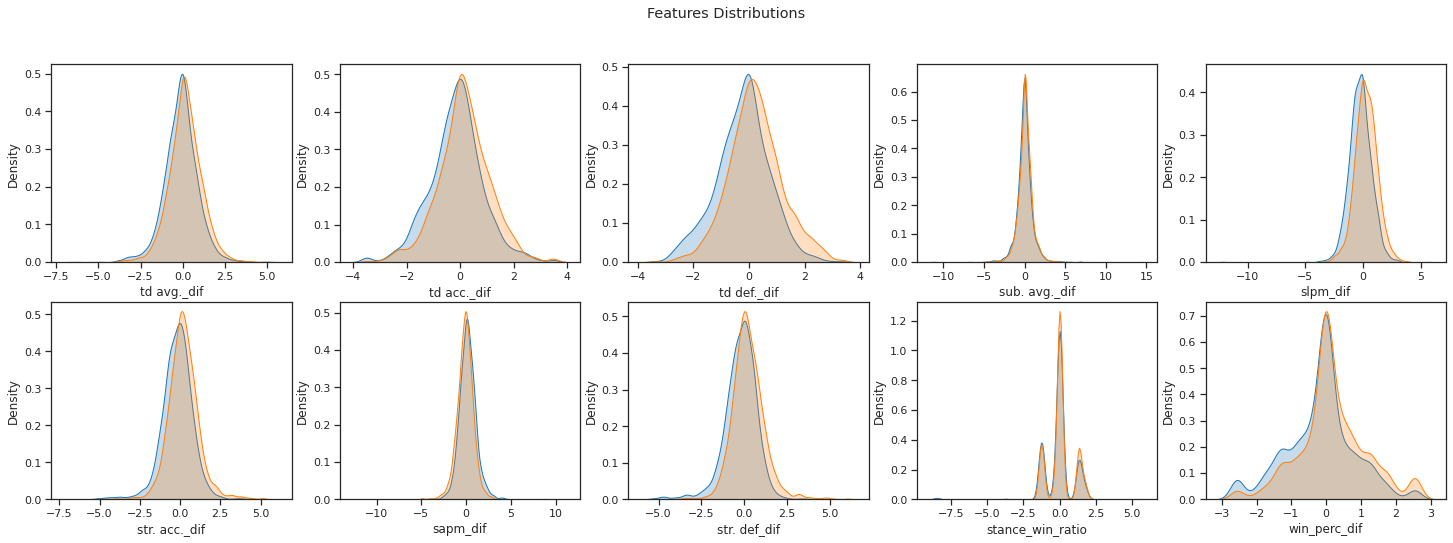

In [23]:
rows= 2
cols= int(len(X)/2)
fig, axs = plt.subplots(rows,cols,figsize = (25,8))
fig.suptitle('Features Distributions')

for i in range(0,cols):
    sns.kdeplot(ax=axs[0,i], data=df[df.result == 'lose'], x=X[i], fill=True)
    sns.kdeplot(ax=axs[0,i], data=df[df.result == 'win'], x=X[i], fill=True)

for i in range(0,cols):
    sns.kdeplot(ax=axs[1,i], data=df[df.result == 'lose'], x=X[i+cols], fill=True)
    sns.kdeplot(ax=axs[1,i], data=df[df.result == 'win'], x=X[i+cols], fill=True)

for the most part fighter's sklill are similar when they meet in the octagon = not many outlier ( > 3 sigma data points).
i will clear any > 3 sigma data points

In [24]:
original_size = len(df)

for feature in X:
    df = df[df[feature] <= 3]
    
print('Rows deleted: %d' %(original_size-len(df)))

Rows deleted: 300


### <span style='color:green'> **[done]** </span> EDA for predicting 'kd_dif', 'str_dif', 'td_dif', 'sub_dif' (=fight statistics)
all features are normalized > only correlated features will be included in finale model

str_dif correlation:


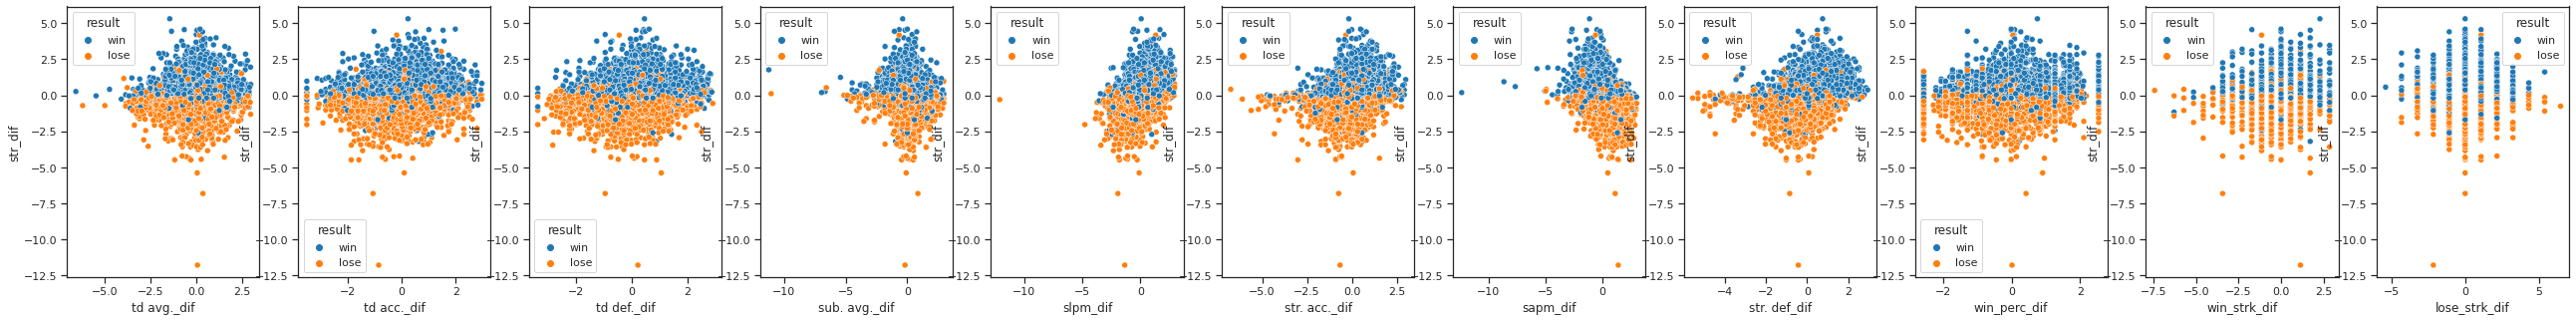

In [25]:
features = ['result','str_dif','td avg._dif','td acc._dif',
            'td def._dif','sub. avg._dif','slpm_dif','str. acc._dif',
            'sapm_dif','str. def_dif','win_perc_dif','win_strk_dif','lose_strk_dif']
rows = 1
cols = len(features)-2
fig, axs = plt.subplots(rows,cols,figsize = (45,5))
print('str_dif correlation:')

for i,column in zip(range(0,len(features)),features[2:]):
    sns.scatterplot(ax=axs[i],y='str_dif',x=column,data=df,hue='result')

kd_dif correlation:


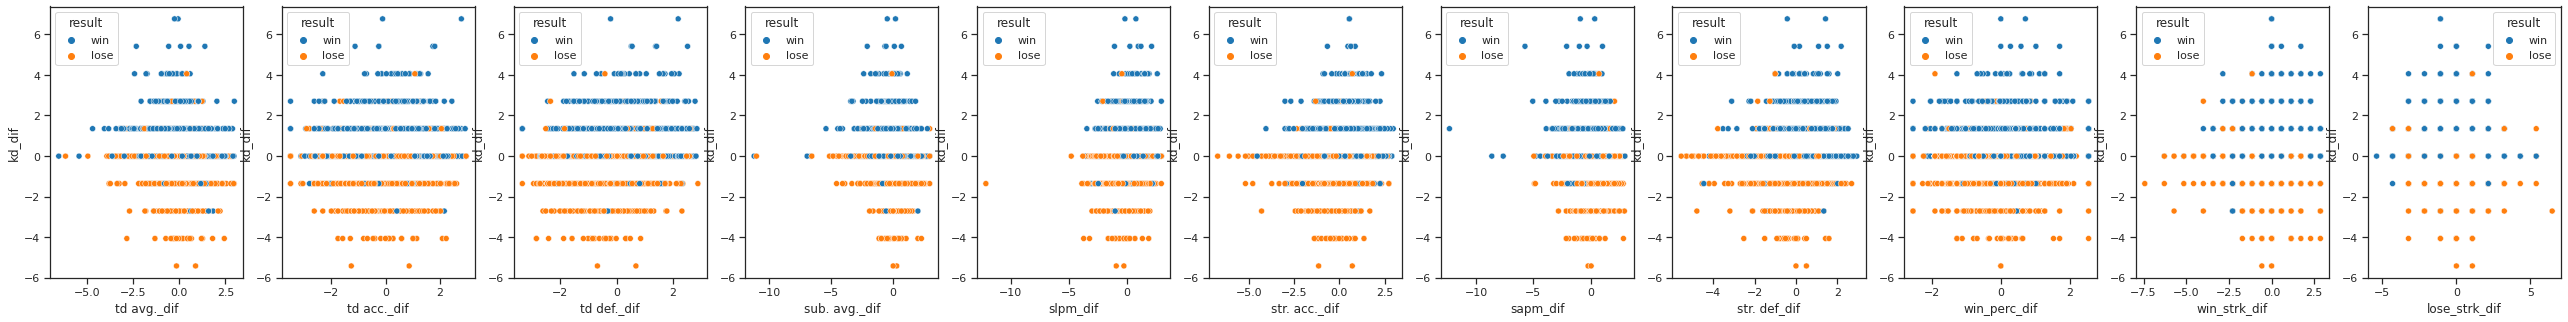

In [26]:
features = ['result','kd_dif','td avg._dif','td acc._dif',
            'td def._dif','sub. avg._dif','slpm_dif','str. acc._dif',
            'sapm_dif','str. def_dif','win_perc_dif','win_strk_dif','lose_strk_dif']
rows = 1
cols = len(features)-2
fig, axs = plt.subplots(rows,cols,figsize = (45,5))
print('kd_dif correlation:')

for i,column in zip(range(0,len(features)),features[2:]):
    sns.scatterplot(ax=axs[i],y='kd_dif',x=column,data=df,hue='result')

td_dif correlation:


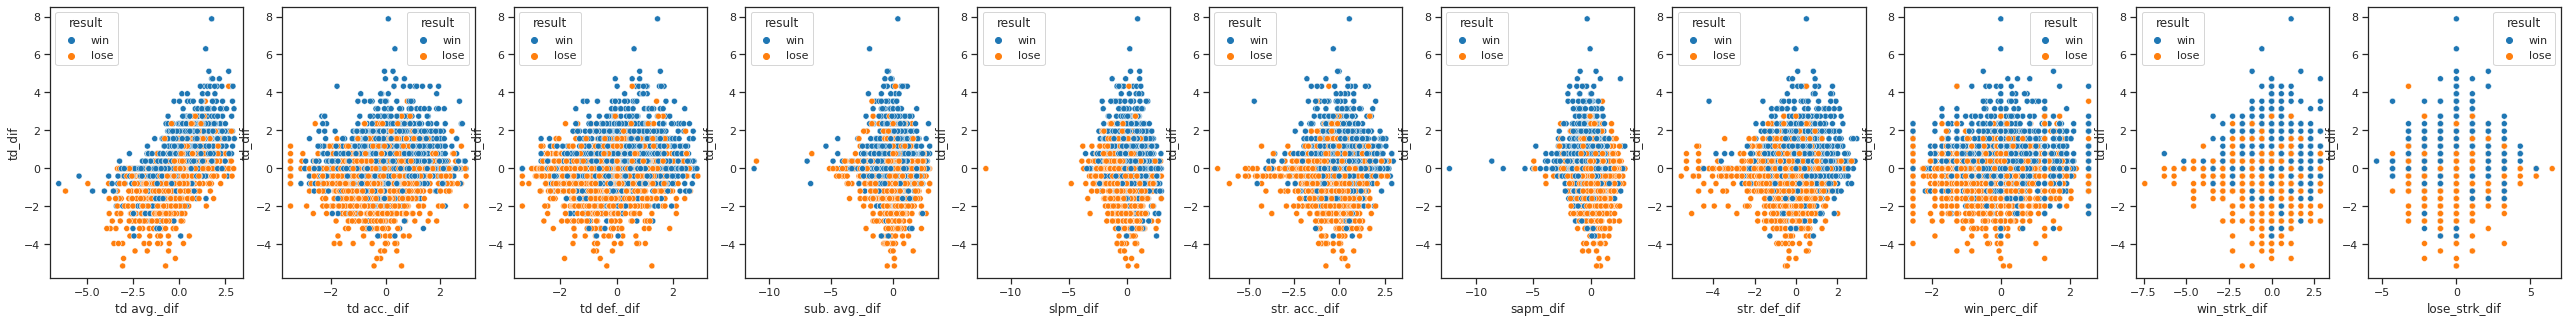

In [27]:
features = ['result','td_dif','td avg._dif','td acc._dif',
            'td def._dif','sub. avg._dif','slpm_dif','str. acc._dif',
            'sapm_dif','str. def_dif','win_perc_dif','win_strk_dif','lose_strk_dif']
rows = 1
cols = len(features)-2
fig, axs = plt.subplots(rows,cols,figsize = (45,5))
print('td_dif correlation:')

for i,column in zip(range(0,len(features)),features[2:]):
    sns.scatterplot(ax=axs[i],y='td_dif',x=column,data=df,hue='result')

only ['td avg._dif','td def._dif','str. acc._dif'] have correlation to td_dif  = will include as feature

sub_dif correlation:


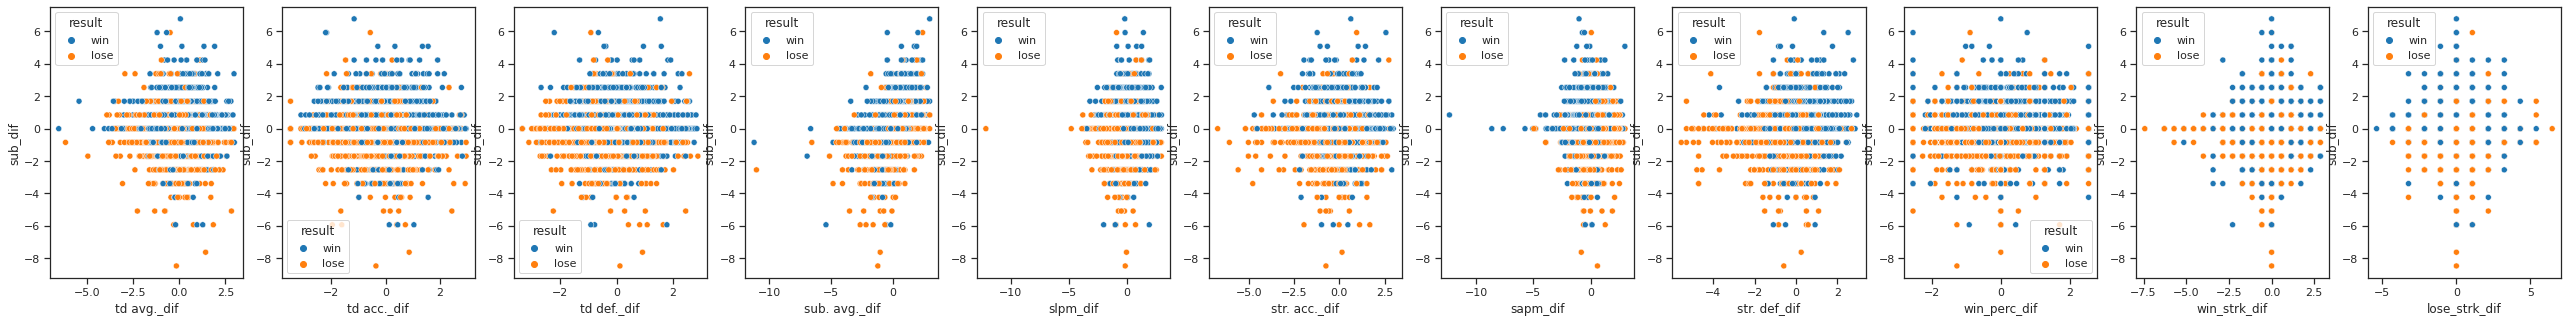

In [28]:
features = ['result','sub_dif','td avg._dif','td acc._dif',
            'td def._dif','sub. avg._dif','slpm_dif','str. acc._dif',
            'sapm_dif','str. def_dif','win_perc_dif','win_strk_dif','lose_strk_dif']
rows = 1
cols = len(features)-2
fig, axs = plt.subplots(rows,cols,figsize = (45,5))
print('sub_dif correlation:')

for i,column in zip(range(0,len(features)),features[2:]):
    sns.scatterplot(ax=axs[i],y='sub_dif',x=column,data=df,hue='result')

### <span style='color:green'> [done] </span> Correlations Report:

In [29]:
def get_r_score(X, y):
    from scipy.stats import pearsonr
    r, _ = pearsonr(X, y)
    return r

In [30]:
def get_sig_features(data, sig_r):
    '''return list of most significant columns from corr data frame'''
    sig_features = []
    for i in data.columns:
        for j in data.index.values:
            if data.loc[j,i] in sig_r:
                sig_features.append(j)
            
    return sig_features

---------------------------------------------
Correlation Report: Most significant features
---------------------------------------------
R coef > Median R: [0.42, 0.27, 0.31, 0.29, 0.58, 0.39]
Most significant: ['sapm_dif', 'slpm_dif', 'str. acc._dif', 'str. def_dif', 'sub. avg._dif', 'td avg._dif']


y,kd_dif,str_dif,sub_dif,td_dif
X,,,,
lose_strk_dif,0.05,0.03,0.0,0.01
sapm_dif,0.05,0.31,0.01,0.14
slpm_dif,0.16,0.42,0.03,0.04
str. acc._dif,0.11,0.27,0.03,0.07
str. def_dif,0.09,0.29,0.06,0.12
sub. avg._dif,0.07,0.05,0.39,0.03
sub_dif,0.03,0.05,1.0,0.06
td acc._dif,0.05,0.14,0.01,0.18
td avg._dif,0.08,0.07,0.03,0.58


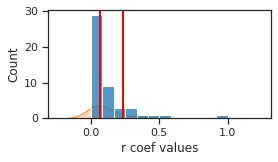

In [31]:
rdf = pd.DataFrame(columns=['y','X','r_coef'])
r_list = []
y_columns = ['kd_dif','str_dif','td_dif','sub_dif']
i = 0 
for y_column in y_columns:
    for x_column in features[1:]:
        rdf.loc[i, 'X'] = x_column
        rdf.loc[i, 'y'] = y_column
        rdf.loc[i, 'r_coef'] = np.round(np.abs(get_r_score(X=df[x_column], y=df[y_column])),2)
        r_list.append(rdf.loc[i, 'r_coef'])
        i += 1

rdf = rdf.pivot('X','y','r_coef')
print('---------------------------------------------')
print('Correlation Report: Most significant features')
print('---------------------------------------------')

sig_r =  [r for r in r_list if (r > (np.median(r_list)+np.std(r_list)) and r < 1)]
sig_features = get_sig_features(data=rdf, sig_r=sig_r)
print('R coef > Median R: %s' %(sig_r))
print('Most significant: %s' %(sig_features) )

g = plt.figure(figsize=(4,2))
g = sns.histplot(x = r_list, bins=len(rdf))
g = sns.kdeplot(x = r_list, fill=True)
plt.axvline(x = np.median(r_list)+np.std(r_list), color='red')
plt.axvline(x = np.median(r_list), color='red')
plt.xlabel("r coef values")
plt.ylabel("Count")

rdf

features with R coef > red line is significant enough to be included

In [32]:
X_columns = sig_features
X_columns

['sapm_dif',
 'slpm_dif',
 'str. acc._dif',
 'str. def_dif',
 'sub. avg._dif',
 'td avg._dif']

In [33]:
fdf = (df[X_columns]).copy()
for y_column in ['kd_dif','str_dif','td_dif','sub_dif']:
    fdf[y_column] = df[y_column]

fdf['fighter'] = df['fighter']
fdf['opponent'] = df['opponent']
fdf['result'] = df['result']
fdf = (fdf.dropna()).reset_index(drop=True)
fdf.head()

,sapm_dif,slpm_dif,str. acc._dif,str. def_dif,sub. avg._dif,td avg._dif,kd_dif,str_dif,td_dif,sub_dif,fighter,opponent,result
0,-1.189442,0.621894,0.712355,1.433920,0.479627,0.348931,-0.006641,3.013184,-0.017596,-0.007176,Ciryl Gane,Tai Tuivasa,win
1,-0.169570,0.172769,-0.179637,0.172357,-0.569102,-0.593240,-0.006641,1.506556,0.377202,-0.007176,Robert Whittaker,Marvin Vettori,win
2,0.630449,-0.301658,-1.801440,-0.668685,-2.285204,0.226281,-0.006641,-0.226067,-0.807193,-1.701885,Joaquin Buckley,Nassourdine Imavov,lose
3,-0.200105,-0.080259,-0.422907,0.088253,0.002932,0.610955,-1.361130,-0.791053,-0.017596,-0.007176,Alessio Di Chirico,Roman Kopylov,lose
4,-0.462707,0.501706,0.631265,0.676982,-0.950458,1.675776,-0.006641,0.414250,1.166799,-0.854531,William Gomis,Jarno Errens,win


In [34]:
X = fdf[X_columns]
y_columns = fdf.columns[fdf.columns.get_loc('kd_dif'):fdf.columns.get_loc('kd_dif')+4]
y = fdf[y_columns]

print('X = ' + str(X_columns))
print('y = '+ str(y_columns))

X = ['sapm_dif', 'slpm_dif', 'str. acc._dif', 'str. def_dif', 'sub. avg._dif', 'td avg._dif']
y = Index(['kd_dif', 'str_dif', 'td_dif', 'sub_dif'], dtype='object')


### <span style='color:green'> **[done]** </span> Splitting data to Training set/Test set/Validation:

In [35]:
def set_train_test(X_columns=X_columns, y_columns=y_columns, data=fdf, test_size=0.3, valid_size=0.1):
    
    if 'set' not in data.columns:
        data.insert(0, 'set', None) # inserd 'set' column to position 0

    for i in range(len(df)):
        
        if random.random() < test_size:
            data.loc[i,'set'] = 'test'
        else:
            if random.random() < valid_size:
                data.loc[i,'set'] = 'validation'
            else:
                data.loc[i,'set'] = 'train' 

    X_train = data[X_columns][data.set=='train'] 
    X_test = data[X_columns][data.set=='test']
    y_train = data[y_columns][data.set=='train']
    y_test = data[y_columns][data.set=='test']
    X_val = data[X_columns][data.set=='validation']
    y_val = data[y_columns][data.set=='validation']

    print('Data split: Data=%s, train_set=%s, validation_set=%s, test_set=%s'  %(str(data.shape), str(X_train.shape), str(X_val.shape), str(X_test.shape)))
    return data

### <span style='color:green'> **[done]** </span> Predicting Fight stats:

#### <span style='color:green'> **[done]** </span> Train KNN Classifier:

In [36]:
def set_knn_reg(X_columns=X_columns, y_columns=y_columns, data=df, n=10):
    
    from sklearn.neighbors import KNeighborsRegressor
    
    knn_reg=KNeighborsRegressor(n_neighbors=n, algorithm='ball_tree')
    X_train = data[X_columns][data.set=='train']
    y_train = data[y_columns][data.set=='train']
    knn_reg.fit(X_train,y_train)
    return knn_reg

In [37]:
def set_predictions(model, data=df, X_columns=X_columns, y_columns=y_columns):
    
    for column in y_columns:
        data[column + '_pred'] = None
        data[column + '_pred'] = model.predict(data[X_columns])
    
    return data

In [38]:
def get_rmse(act, pred):
    
    from sklearn.metrics import mean_squared_error
    import math
    return round(math.sqrt(mean_squared_error(act, pred))/(np.max(act) - np.min(act)),4)

In [39]:
data =fdf
fdf = set_train_test(X_columns=X_columns, y_columns=y_columns, data=data, test_size=0.3, valid_size=0.1)
knn_reg = set_knn_reg(X_columns=X_columns, y_columns=y_columns, data=data, n=5)
fdf = set_predictions(model=knn_reg, data=data, X_columns=X_columns, y_columns=y_columns)
knn_reg
fdf.tail(3)

Data split: Data=(6431, 14), train_set=(4045, 6), validation_set=(448, 6), test_set=(1938, 6)


,set,sapm_dif,slpm_dif,str. acc._dif,str. def_dif,sub. avg._dif,td avg._dif,kd_dif,str_dif,td_dif,sub_dif,fighter,opponent,result,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
6428,test,0.520523,0.590266,0.306904,-1.257415,-0.187746,0.153807,-0.006641,-0.188401,1.561597,-0.007176,Aleksandra Albu,Kailin Curran,win,-0.006641,-0.006641,-0.006641,-0.006641
6429,train,-0.108500,-0.289007,0.306904,-0.079956,0.384288,0.956603,-0.006641,-0.188401,1.561597,-0.007176,Jarred Brooks,Eric Shelton,win,-0.548436,-0.548436,-0.548436,-0.548436
6430,train,0.654877,1.121624,-0.260727,0.004148,-0.187746,-0.989064,1.347848,0.112924,-0.017596,-0.007176,Drew Dober,Joshua Burkman,win,0.535155,0.535155,0.535155,0.535155


## <span style='color:green'> **[done]** </span> Tune Model parameters:

In [40]:
traindf = pd.DataFrame(columns=['neighbors','rmse','kd_dif_rmse','str_dif_rmse','td_dif_rmse','sub_dif_rmse'])
fdf = set_train_test(X_columns=X_columns, y_columns=y_columns, data=fdf, test_size=0.3, valid_size=0.1)

for n in np.arange(1,50,5):
    index = len(traindf)
    traindf.loc[index, 'neighbors'] = n
    
    knn_reg = set_knn_reg(X_columns=X_columns, y_columns=y_columns, data=fdf, n=n)
    fdf = set_predictions(model=knn_reg, data=fdf, X_columns=X_columns, y_columns=y_columns)
    
    for stat in y_columns:
        y_val_act = fdf[stat][fdf.set=='validation']
        y_val_pred = fdf[stat+'_pred'][fdf.set=='validation']
        traindf.loc[index, stat+'_rmse'] = get_rmse(act=y_val_act, pred=y_val_pred)

    traindf.loc[index,'rmse'] = 0.25 * (traindf.loc[index,'kd_dif_rmse'] + traindf.loc[index,'str_dif_rmse'] + traindf.loc[index,'td_dif_rmse'] + traindf.loc[index,'sub_dif_rmse'])
    
traindf

Data split: Data=(6431, 18), train_set=(4048, 6), validation_set=(469, 6), test_set=(1914, 6)


,neighbors,rmse,kd_dif_rmse,str_dif_rmse,td_dif_rmse,sub_dif_rmse
0,1,0.158225,0.1773,0.1608,0.1693,0.1255
1,6,0.116625,0.1299,0.1121,0.1278,0.0967
2,11,0.1135,0.1257,0.1084,0.124,0.0959
3,16,0.111975,0.1242,0.1079,0.1212,0.0946
4,21,0.11105,0.1231,0.1079,0.1196,0.0936
5,26,0.11075,0.1229,0.1079,0.1189,0.0933
6,31,0.110575,0.1233,0.1075,0.1182,0.0933
7,36,0.110075,0.1225,0.1071,0.1176,0.0931
8,41,0.109825,0.1222,0.1069,0.1173,0.0929
9,46,0.109475,0.1221,0.1064,0.1166,0.0928


Best Tuned Model(=min neighbors + min average_rmse error):


,neighbors,rmse,kd_dif_rmse,str_dif_rmse,td_dif_rmse,sub_dif_rmse
9,46,0.109475,0.1221,0.1064,0.1166,0.0928


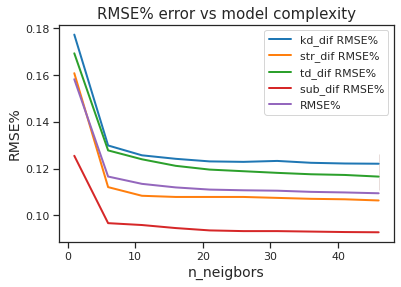

In [41]:
min_rmse = np.min(traindf['rmse'])
opt_n = np.min(traindf['neighbors'][traindf.rmse == min_rmse])

for stat in ['kd','str','td','sub']:
    g = sns.lineplot(data=traindf, y=stat + '_dif_rmse', x='neighbors', label=stat + '_dif RMSE%')
    
g = sns.lineplot(data=traindf, y='rmse', x='neighbors', label='RMSE%') 
g = sns.lineplot(y=traindf['rmse'], x= opt_n) 

g.set_title('RMSE% error vs model complexity', fontsize=15)
g.set_xlabel('n_neigbors', fontsize=14)
g.set_ylabel('RMSE%', fontsize=14)
g.legend()

print('Best Tuned Model(=min neighbors + min average_rmse error):')
best_model = traindf[traindf.neighbors == opt_n]
best_model

best model is average model for as many neighbors as possible, but it doesnt get a lot better after 6 neighbors,
so im choosing simple n=6 model to work with

In [42]:
n = 40
knn_reg = set_knn_reg(X_columns=X_columns, y_columns=y_columns, data=fdf, n=n)
fdf = set_predictions(model=knn_reg, data=fdf, X_columns=X_columns, y_columns=y_columns)
knn_reg

KNeighborsRegressor(algorithm='ball_tree', n_neighbors=40)

### <span style='color:green'> **[done]** </span> Model evaluation (=Test_set score):

In [44]:
testdf = pd.DataFrame(columns=['neighbors','rmse','kd_dif_rmse','str_dif_rmse','td_dif_rmse','sub_dif_rmse'])

for stat in y_columns:
    testdf.loc[index, 'neighbors'] = n
    y_test_act = fdf[stat][fdf.set=='test']
    y_test_pred = fdf[stat+'_pred'][fdf.set=='test']
    testdf.loc[index, stat+'_rmse'] = get_rmse(act=y_test_act, pred=y_test_pred)

testdf.loc[index,'rmse'] = 0.25 * (testdf.loc[index,'kd_dif_rmse'] + testdf.loc[index,'str_dif_rmse'] + testdf.loc[index,'td_dif_rmse'] + testdf.loc[index,'sub_dif_rmse'])
    
print('RMSE% for fight stat:')
testdf

RMSE% for fight stat:


,neighbors,rmse,kd_dif_rmse,str_dif_rmse,td_dif_rmse,sub_dif_rmse
9,40,0.094075,0.0923,0.1014,0.1099,0.0727


### <span style='color:green'> **[done]** </span> Opt Model view:

<AxesSubplot:xlabel='sub_dif', ylabel='Density'>

<Figure size 864x1080 with 0 Axes>

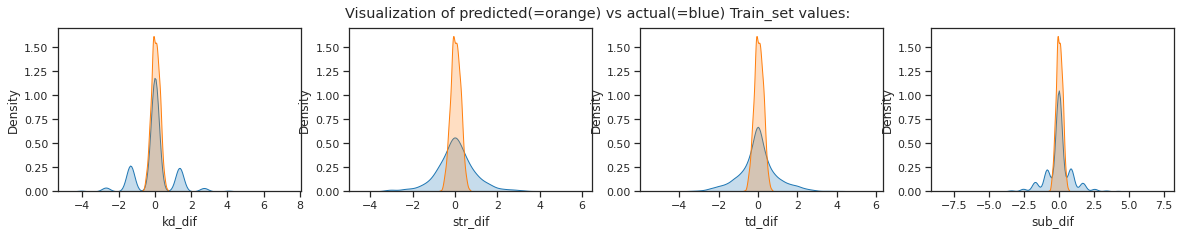

In [45]:
rows=1
cols=4
data = fdf[fdf.set == 'test']
plt.figure(figsize = (12,15))
fig, axs = plt.subplots(rows,cols,figsize = (20,3))
fig.suptitle('Visualization of predicted(=orange) vs actual(=blue) Train_set values:')

sns.kdeplot(ax=axs[0],x=data['kd_dif'],fill=True)
sns.kdeplot(ax=axs[0],x=data['kd_dif_pred'],fill=True)

sns.kdeplot(ax=axs[1],x=data['str_dif'],fill=True)
sns.kdeplot(ax=axs[1],x=data['str_dif_pred'],fill=True)

sns.kdeplot(ax=axs[2],x=data['td_dif'],fill=True)
sns.kdeplot(ax=axs[2],x=data['td_dif_pred'],fill=True)

sns.kdeplot(ax=axs[3],x=data['sub_dif'],fill=True)
sns.kdeplot(ax=axs[3],x=data['sub_dif_pred'],fill=True)

we can see that model predicting the average stat produce the best model (= the features is not very strong predictors)

### <span style='color:green'> **[done]** </span> Predicting Fight outcome (=win/lose):

In [46]:
def set_desicion_tree_clf(X_columns=X_columns, y_columns=y_columns, data=df, tree_depth=len(data.columns)):
    
    from sklearn.tree import DecisionTreeClassifier
    tree_clf = DecisionTreeClassifier(max_depth=tree_depth, random_state=1)
    X_train = data[X_columns][data.set=='train']
    y_train = data[y_columns][data.set=='train']
    tree_clf.fit(X_train,y_train)
    
    return tree_clf

In [47]:
def set_forest_clf(X_columns, y_columns, n_estimators, tree_depth, data):
    
    from sklearn.ensemble import RandomForestClassifier
    forest_clf = RandomForestClassifier(max_depth=tree_depth, random_state=0, n_estimators=n_estimators)
    
    X_train = data[X_columns][data.set=='train']
    y_train = data[y_columns][data.set=='train']
    forest_clf.fit(X_train,y_train)
    
    return forest_clf

In [48]:
def get_accuracy(act, pred):
    
    from sklearn.metrics import accuracy_score
    return accuracy_score(act, pred)

In [49]:
X_columns = list(df.columns[18:len(df.columns)])
fight_stats = ['kd_dif','str_dif','td_dif','sub_dif']
X_columns.extend(fight_stats)
y_columns = 'result'
print(X_columns)
print(y_columns)

['stance_win_ratio', 'win_perc_dif', 'win_strk_dif', 'lose_strk_dif', 'kd_dif', 'str_dif', 'td_dif', 'sub_dif']
result


In [50]:
pdf = (df[X_columns]).copy()
pdf[y_columns] = df[y_columns]
pdf = (pdf.dropna()).reset_index(drop=True)
pdf.tail(3)

,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,kd_dif,str_dif,td_dif,sub_dif,result
6428,0.016113,2.032286,0.573098,-2.154226,-0.006641,-0.188401,1.561597,-0.007176,win
6429,-0.304653,-0.011958,0.001105,-1.076953,-0.006641,-0.188401,1.561597,-0.007176,win
6430,1.344545,0.115807,0.001105,-2.154226,1.347848,0.112924,-0.017596,-0.007176,win


## <span style='color:green'> **[done]** </span> Train Random Forest model:

In [51]:
pdf = set_train_test(X_columns=X_columns, y_columns='result', data=pdf, test_size=0.3, valid_size=0.1)
forest_clf = set_forest_clf(X_columns=X_columns, y_columns='result', data=pdf,tree_depth=2, n_estimators=100 )
pdf = set_predictions(model=forest_clf, data=pdf, X_columns=X_columns, y_columns=[y_columns])
print('Score: ' + str(get_accuracy(act=pdf['result'], pred=pdf['result_pred'])))
forest_clf

Data split: Data=(6431, 10), train_set=(4029, 8), validation_set=(477, 8), test_set=(1925, 8)
Score: 0.8197791945265122


RandomForestClassifier(max_depth=2, random_state=0)

## <span style='color:green'> **[done]** </span> Tune model parameters:

In [52]:
traindf = pd.DataFrame(columns=['n_trees','accuracy'])
pdf = set_train_test(X_columns=X_columns, y_columns=y_columns, data=pdf, test_size=0.3, valid_size=0.2)

for n in range(1,200,1):

    index = len(traindf)
    traindf.loc[index, 'n_trees'] = n
    
    forest_clf = set_forest_clf(X_columns=X_columns, y_columns=y_columns, data=pdf, n_estimators=n, tree_depth=len(X_columns))
    pdf = set_predictions(model=forest_clf, data=pdf, X_columns=X_columns, y_columns=[y_columns])
    
    y_val_act = pdf['result'][pdf.set=='validation']
    y_val_pred = pdf['result_pred'][pdf.set=='validation']

    traindf.loc[index, 'accuracy'] = get_accuracy(act=y_val_act, pred=y_val_pred)
    
traindf

Data split: Data=(6431, 11), train_set=(3624, 8), validation_set=(906, 8), test_set=(1901, 8)


,n_trees,accuracy
0,1,0.790287
1,2,0.821192
2,3,0.836645
3,4,0.853201
4,5,0.84106
...,...,...
194,195,0.853201
195,196,0.854305
196,197,0.855408
197,198,0.856512


Best Parameters:


,n_trees,accuracy
0,16,0.866446


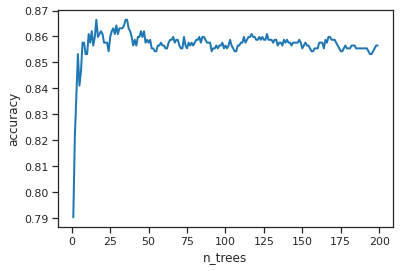

In [53]:
print('Best Parameters:')
best_acc = traindf.accuracy.max()
t = traindf[traindf.accuracy == best_acc]
t = t[t.n_trees == t.n_trees.min()].reset_index(drop=True)
sns.lineplot(y='accuracy', x='n_trees', data=traindf)
t.head()

In [54]:
n_trees = t.n_trees[0]
pdf = set_train_test(X_columns=X_columns, y_columns='result', data=pdf, test_size=0.3, valid_size=0.1)
forest_clf = set_forest_clf(X_columns=X_columns, y_columns='result', data=pdf, n_estimators=n_trees, tree_depth=len(X_columns))
pdf = set_predictions(model=forest_clf, data=pdf, X_columns=X_columns, y_columns=[y_columns])
print('Accuracy: ' + str(get_accuracy(act=pdf['result'][pdf.set=='test'], pred=pdf['result_pred'][pdf.set=='test'])))
forest_clf

Data split: Data=(6431, 11), train_set=(4077, 8), validation_set=(457, 8), test_set=(1897, 8)
Accuracy: 0.8624143384290985


RandomForestClassifier(max_depth=8, n_estimators=16, random_state=0)

## <span style='color:green'> **[done]** </span> Visualize win/lose Decision Tree model:

In [55]:
import matplotlib.pyplot as plt
from sklearn import tree 

fig = plt.figure(figsize=(16, 30))
f_tree = forest_clf.estimators_[20]
tree.plot_tree(f_tree,
               feature_names = X_columns, 
               class_names= y_columns,
               max_depth=(X.columns).size,
               rounded=True, 
               filled = True,
               proportion = True, 
               precision = 2,
               impurity = True,
               fontsize=14
              );

IndexError: list index out of range

<Figure size 1152x2160 with 0 Axes>

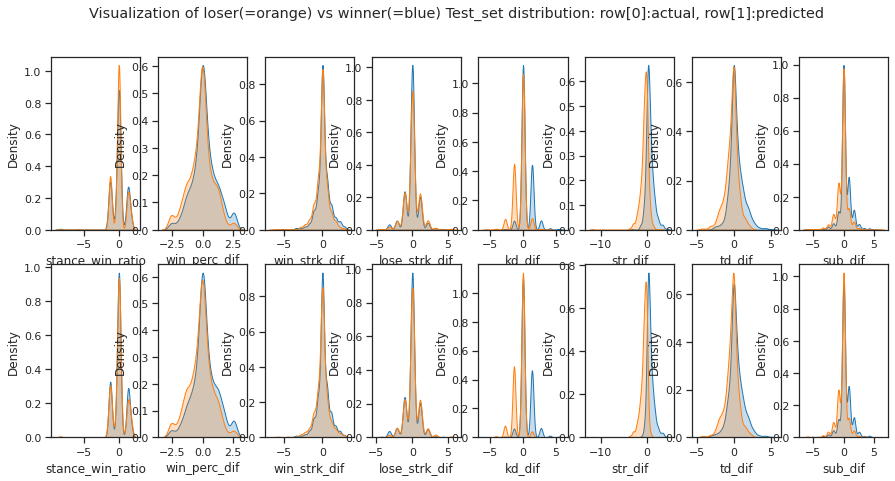

In [56]:
rows=2
cols=len(X_columns)
data = pdf[pdf.set == 'test']
fig, axs = plt.subplots(rows,cols,figsize = (15,7))
fig.suptitle('Visualization of loser(=orange) vs winner(=blue) Test_set distribution: row[0]:actual, row[1]:predicted')

for feature,col in zip(X_columns,range(0,cols)):
    sns.kdeplot(ax=axs[0,col],x=data[feature][data.result == 'win'], fill=True)
    sns.kdeplot(ax=axs[0,col],x=data[feature][data.result == 'lose'], fill=True)
    sns.kdeplot(ax=axs[1,col],x=data[feature][data.result_pred == 'win'], fill=True)
    sns.kdeplot(ax=axs[1,col],x=data[feature][data.result_pred == 'lose'], fill=True)


## <span style='color:green'> **[done]** </span> Model evaluation (=Test_set score):

Accuracy = 0.862414


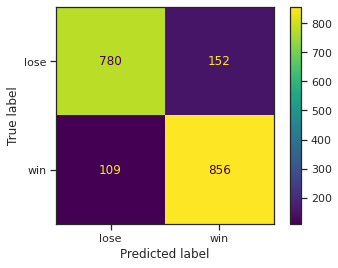

In [57]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_test_act = pdf['result'][pdf.set=='test']
y_test_pred = pdf['result_pred'][pdf.set=='test']

print('Accuracy = %.6f' % accuracy_score(y_test_act,y_test_pred))
ConfusionMatrixDisplay.from_predictions(y_test_act,y_test_pred)  

In [ ]:
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>